In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv("E:\\End to end Linear Reg with deployment\\Heart Disease Prediction\\Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [5]:
df[df.isnull().any(axis=1)]

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease


In [6]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [7]:
df["Heart Disease"].unique()

array(['Presence', 'Absence'], dtype=object)

In [8]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [9]:
df["Heart Disease"] = df["Heart Disease"].map({'Presence' : 1, 'Absence' : 0})

In [10]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [11]:
X = df.drop(["Heart Disease", "Max HR"],axis=1)
y = df["Heart Disease"]

In [12]:
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,0,2.4,2,3,3
1,67,0,3,115,564,0,2,0,1.6,2,0,7
2,57,1,2,124,261,0,0,0,0.3,1,0,7
3,64,1,4,128,263,0,0,1,0.2,2,1,7
4,74,0,2,120,269,0,2,1,0.2,1,1,3


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((243, 12), (27, 12), (243,), (27,))

([<matplotlib.patches.Wedge at 0x27b7f109850>,
 [Text(-0.191013134139045, 1.0832885038559115, '0'),
  Text(0.19101348711923324, -1.0832884416158748, '1')],
 [Text(-0.10418898225766089, 0.5908846384668608, '56%'),
  Text(0.10418917479230903, -0.5908846045177498, '44%')])

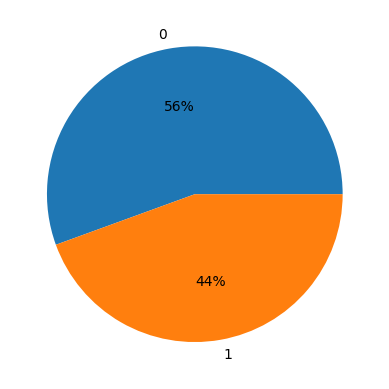

In [14]:
percentage = df["Heart Disease"].value_counts(normalize=True)*100
plt.pie(percentage,labels = percentage.index,autopct='%.0f%%')

In [15]:
#corr = df.corr()

<Axes: >

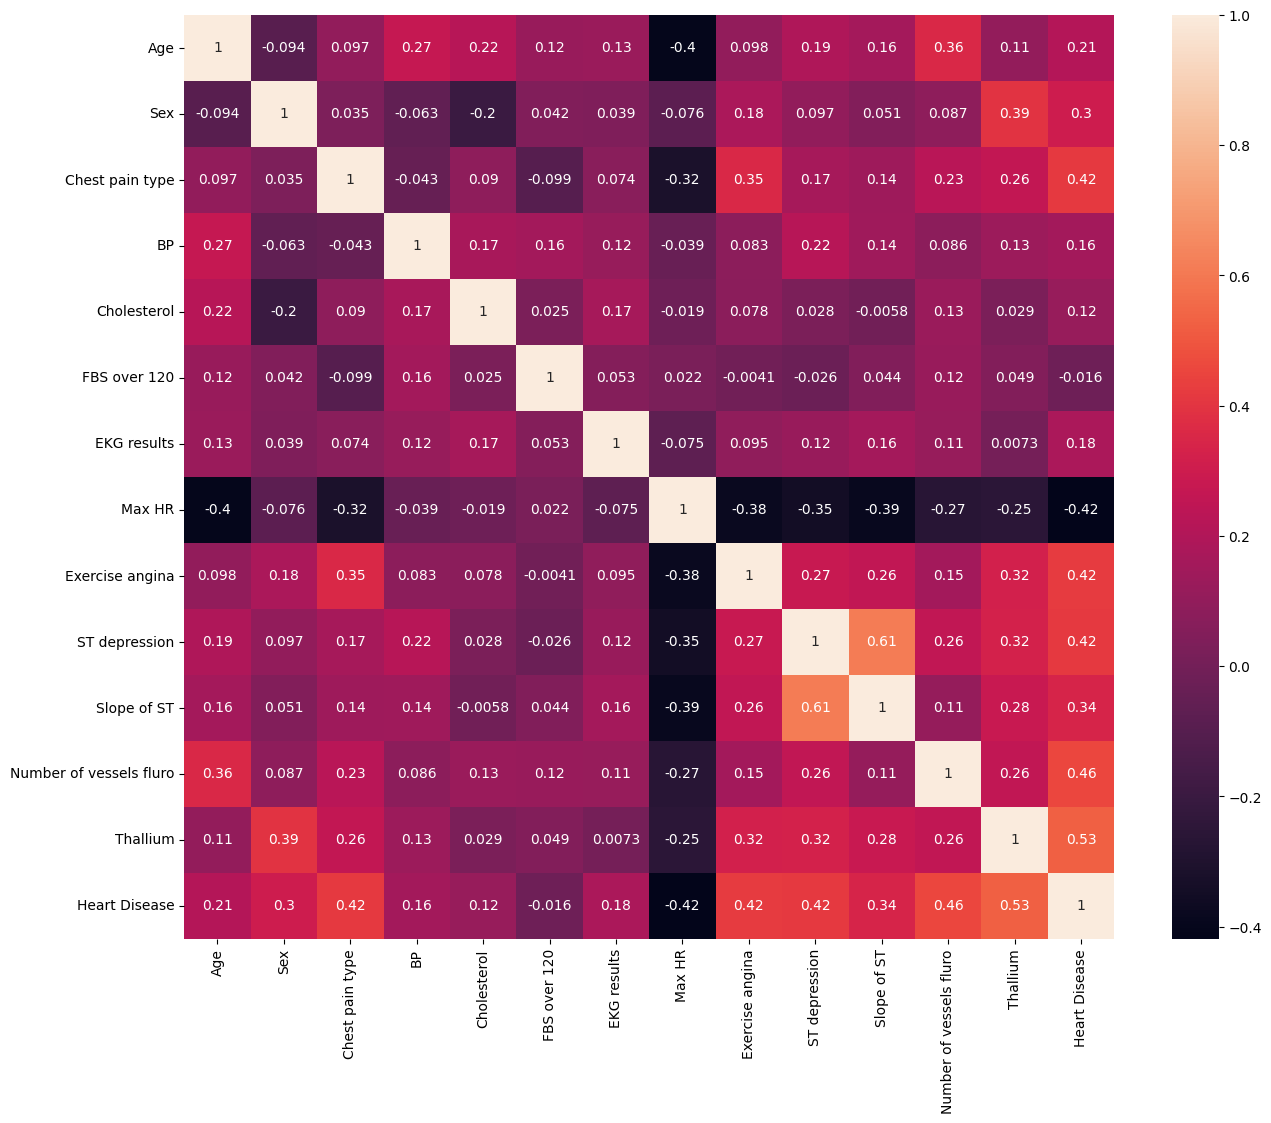

In [16]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = accuracy_score(y_test,y_pred)

In [28]:
print(mse)
print(mae)
print(score)

0.2222222222222222
0.2222222222222222
0.7777777777777778


In [29]:
from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier()
model_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred_1 = model_1.predict(X_test)

In [31]:
mse = mean_squared_error(y_test, y_pred_1)
mae = mean_absolute_error(y_test,y_pred_1)
score = accuracy_score(y_test,y_pred_1)
print(mse)
print(mae)
print(score)


0.14814814814814814
0.14814814814814814
0.8518518518518519


In [32]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
mse = mean_squared_error(y_test, y_pred_2)
mae = mean_absolute_error(y_test,y_pred_2)
score = accuracy_score(y_test,y_pred_2)
print(mse)
print(mae)
print(score)


0.18518518518518517
0.18518518518518517
0.8148148148148148


In [34]:
pickle.dump(scaler,open("scaler.pkl","wb"))
pickle.dump(model_1,open("model_1.pkl","wb"))